In [2]:
import os, sys
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import importlib.util
import joblib

# Get current path from where script is executed
if os.name == 'nt':
    sep = '\\'
elif os.name == 'posix':
    sep = '/'
else:
    print(f'What is this OS? {os.name}')

path = os.getcwd()
pathToSrc =  path[:path.find('src')+3]
pathToGDrive =  path[:path.find('Code')]
path_datasets = pathToGDrive + f'DataSets{sep}'

pathToDataSet = pathToGDrive + f'DataSets{sep}' + 'dataset_test.csv'
df = pd.read_csv(pathToDataSet)


#MapGenerator Lib
path_maps = path + f'{sep}mapGeneration{sep}mapGeneration.py'
spec = importlib.util.spec_from_file_location("mapGeneration", path_maps)
mp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mp)


# Neural Network

In [2]:
from keras.models import model_from_json
path_new = pathToSrc + f'{sep}models{sep}neuralNet{sep}'

# load json and create model
json_file = open(path_new + 'model_neural_network.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_neural_network = model_from_json(loaded_model_json)
# load weights into new model
model_neural_network.load_weights(path_new + "model_neural_network.h5")
print("Loaded model from disk")

Using TensorFlow backend.
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/py

Loaded model from disk


In [3]:
# import functions
path_to_model = pathToSrc + f'{sep}models{sep}neuralNet{sep}neural_network.py'
spec = importlib.util.spec_from_file_location("neuralNet", path_to_model)
neuralNet = importlib.util.module_from_spec(spec)
spec.loader.exec_module(neuralNet)
print('functions loaded')

functions loaded


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/alexisgaziello/Google Drive/Data Prep and Analysis/Code/project_CSP_MATH_571/src/models/neuralNet/neural_network.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_variables[i]] = df[categorical_variables[i]].astype('category').cat.set_categories(categories[i])


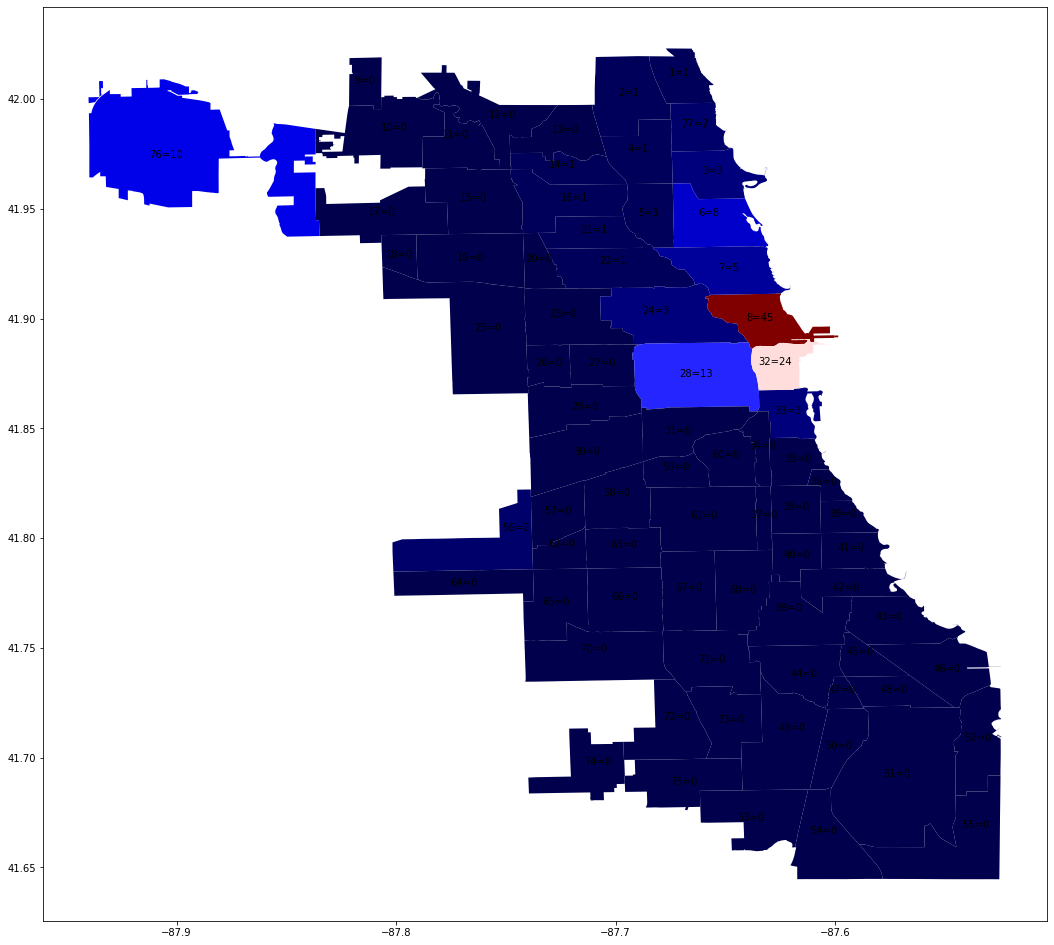

In [4]:
# Test
date = "2019-11-16 16:00:00"
X = neuralNet.TransformDataToX(df, date)
# Predict
Y = model_neural_network.predict(X)
prediction = neuralNet.TransformYToResult(Y)
mp.mapGenerator(prediction)

# Random Forest

In [3]:
# RandomForest 
model_randomForest = joblib.load(path_datasets+"/model/randomForest.pickle")

path_to_model = pathToSrc + f'{sep}models{sep}/randomForest/randomForest.py'
spec = importlib.util.spec_from_file_location("randomForest", path_to_model)
randomForest = importlib.util.module_from_spec(spec)
spec.loader.exec_module(randomForest)

In [5]:
date = "2019-11-16 16:00:00"#getDate from request.form.values:
#row = df[df['trip_start_timestamp'] == date].iloc[0,]

# Transform to array X
X = randomForest.TransformDataToX(df, date)

Y = model_randomForest.predict(X)

C:\Users\Iconsense\abhishek\final\project_CSP_MATH_571-master\src\models\/randomForest/randomForest.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_variables[i]] = df[categorical_variables[i]].astype('category').cat.set_categories(categories[i])
C:\Users\Iconsense\Anaconda3\envs\abhishek\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  58 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 181 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 256 out of 256 | elapsed:    0.0s finished


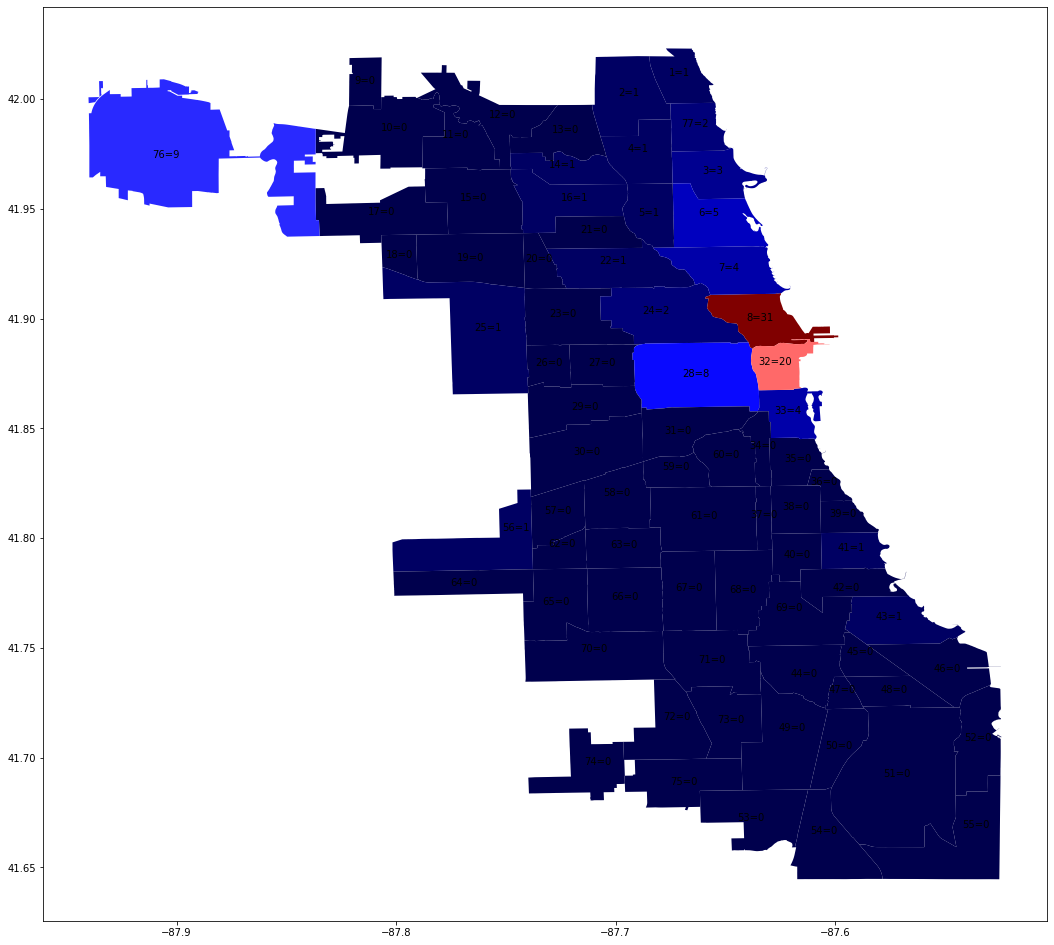

In [11]:
# Predict
Y = model_randomForest.predict(X)
#prediction = np.random.randint(1,200,77)
# Create map

prediction = randomForest.TransformYToResult(Y)
prediction=prediction.tolist()
# Create map
mp.mapGenerator(prediction)


In [ ]:
# Gradientboost
model_Gradientboost = joblib.load(path_datasets+"/model/GBR.pickle")

path_to_model = pathToSrc + f'{sep}models{sep}/Gradientboost/Gradientboost.py'
spec = importlib.util.spec_from_file_location("Gradientboost", path_to_model)
Gradientboost = importlib.util.module_from_spec(spec)
spec.loader.exec_module(Gradientboost)

In [ ]:
date = "2019-11-16 16:00:00"
#getDate from request.form.values:
#row = df[df['trip_start_timestamp'] == date].iloc[0,]

# Transform to array X
X = Gradientboost.TransformDataToX(df, date)



In [ ]:
# Predict
Y = model_Gradientboost.predict(X)
#prediction = np.random.randint(1,200,77)
# Create map

prediction = Gradientboost.TransformYToResult(Y)

# Create map
mp.mapGenerator(prediction)

In [ ]:
# Liner_Regression
model_regression = joblib.load(path_datasets+"/model/reg.pickle")

path_to_model = pathToSrc + f'{sep}models{sep}/regression/regression.py'
spec = importlib.util.spec_from_file_location("regression", path_to_model)
regression = importlib.util.module_from_spec(spec)
spec.loader.exec_module(regression)

In [ ]:
date = "2019-11-16 16:00:00"

# Transform to array X
X = regression.TransformDataToX(df, date)

In [ ]:
# Predict
Y = model_regression.predict(X)
#prediction = np.random.randint(1,200,77)
# Create map

prediction = regression.TransformYToResult(Y)

# Create map
mp.mapGenerator(prediction)